#GRAB Stock Price Prediction
We use ARIMA and LSTM to predict the close, open, and high prices of GRAB's Stocks.

#Importing necessary libraries and Packages


In [ ]:
!pip install pmdarima

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
import time
from sklearn.metrics import mean_squared_error

#Exploratory Data Analysis

##Data Summary and Statistics

In [ ]:
dataset = "https://raw.githubusercontent.com/GertFriborg/Data/main/GRAB.csv"
df = pd.read_csv(dataset)

The `df.head()` and `df.tail()` used to quickly inspect the beginning and end of a DataFrame.

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-12-01,13.595,13.63,11.01,11.01,11.01,8964400
1,2021-12-02,13.055,13.29,8.13,8.75,8.75,35751200
2,2021-12-03,9.160,9.52,8.45,8.99,8.99,29667200
3,2021-12-06,8.950,9.10,8.23,9.00,9.00,25416000
4,2021-12-07,9.055,9.06,8.32,8.85,8.85,25775900


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
610,2024-05-07,3.50,3.510,3.47,3.50,3.50,14917400
611,2024-05-08,3.45,3.510,3.45,3.50,3.50,16323500
612,2024-05-09,3.48,3.565,3.48,3.55,3.55,21456800
613,2024-05-10,3.59,3.590,3.50,3.50,3.50,20061100
614,2024-05-13,3.51,3.560,3.50,3.54,3.54,21822400


The `df.describe()` providing summary statistics that offer insights on the central tendency, dispersion, and shape of the data.

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,615.000000,615.000000,615.000000,615.000000,615.000000,6.150000e+02
mean,3.536870,3.633802,3.421117,3.521382,3.521382,2.077360e+07
std,1.218812,1.242598,1.084514,1.136937,1.136937,1.496897e+07
min,2.330000,2.330000,2.190000,2.310000,2.310000,4.354100e+06
25%,3.000000,3.094500,2.920000,3.000000,3.000000,1.291775e+07
50%,3.230000,3.300000,3.160000,3.230000,3.230000,1.717930e+07
75%,3.540000,3.627500,3.470000,3.525000,3.525000,2.431045e+07
max,13.595000,13.630000,11.010000,11.010000,11.010000,1.788307e+08


The `df.info()` providing an overview of the DataFrame. This includes data types, non-null values, etc.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       615 non-null    object 
 1   Open       615 non-null    float64
 2   High       615 non-null    float64
 3   Low        615 non-null    float64
 4   Close      615 non-null    float64
 5   Adj Close  615 non-null    float64
 6   Volume     615 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 33.8+ KB


Checking for missing values in a pandas DataFrame df which is cruicial for data cleaning and preprocessing.

In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


## Data Cleaning

Accessing the date column to convert it into a DateTime format.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-12-01,13.595,13.630,11.01,11.01,11.01,8964400
1,2021-12-02,13.055,13.290,8.13,8.75,8.75,35751200
2,2021-12-03,9.160,9.520,8.45,8.99,8.99,29667200
3,2021-12-06,8.950,9.100,8.23,9.00,9.00,25416000
4,2021-12-07,9.055,9.060,8.32,8.85,8.85,25775900
...,...,...,...,...,...,...,...
610,2024-05-07,3.500,3.510,3.47,3.50,3.50,14917400
611,2024-05-08,3.450,3.510,3.45,3.50,3.50,16323500
612,2024-05-09,3.480,3.565,3.48,3.55,3.55,21456800
613,2024-05-10,3.590,3.590,3.50,3.50,3.50,20061100


## Data Visualization

In [ ]:
def plotGraph(y,ylabel,title):
  plt.figure(figsize=(15,10))
  #plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
  #plt.margins(x=0)
  plt.plot(df['Date'], y)
  plt.xlabel('Date')
  plt.ylabel(ylabel)
  plt.title(title)
  plt.grid(True)
  plt.show()

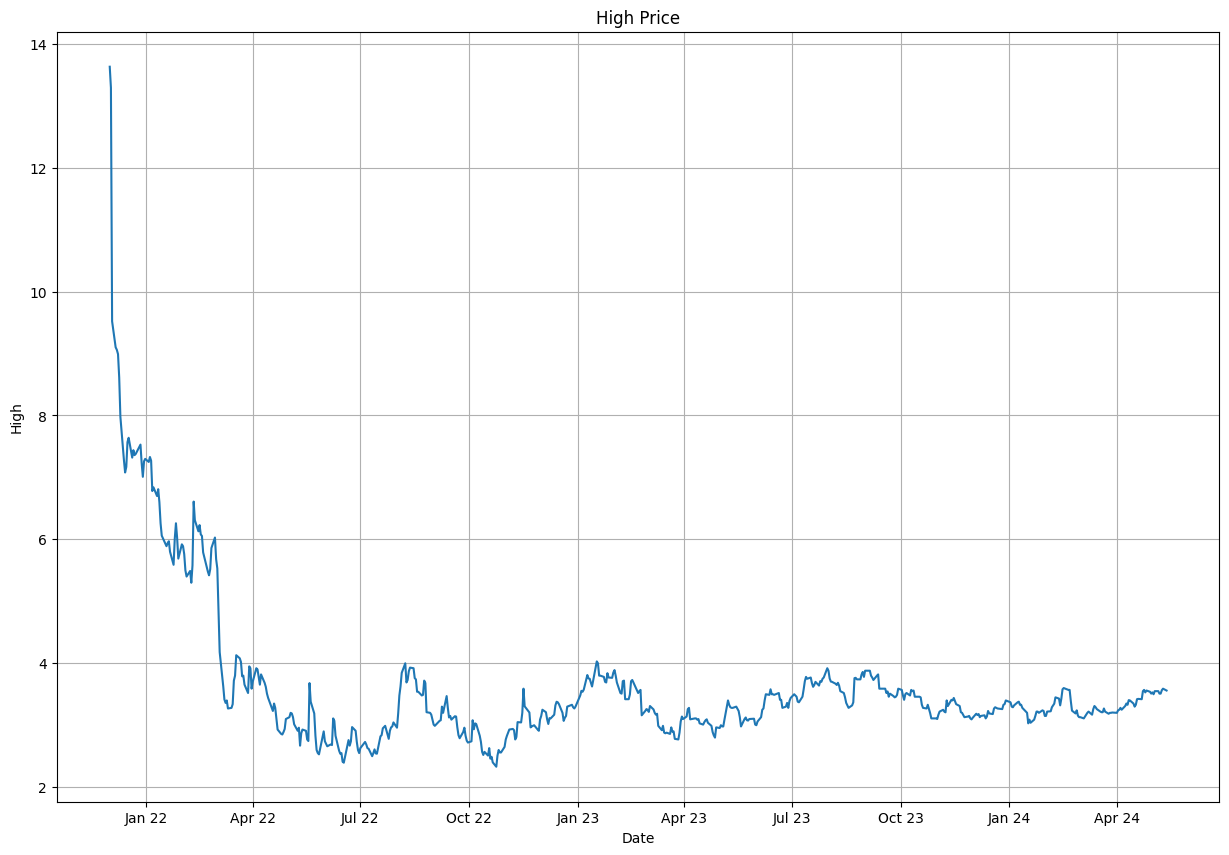

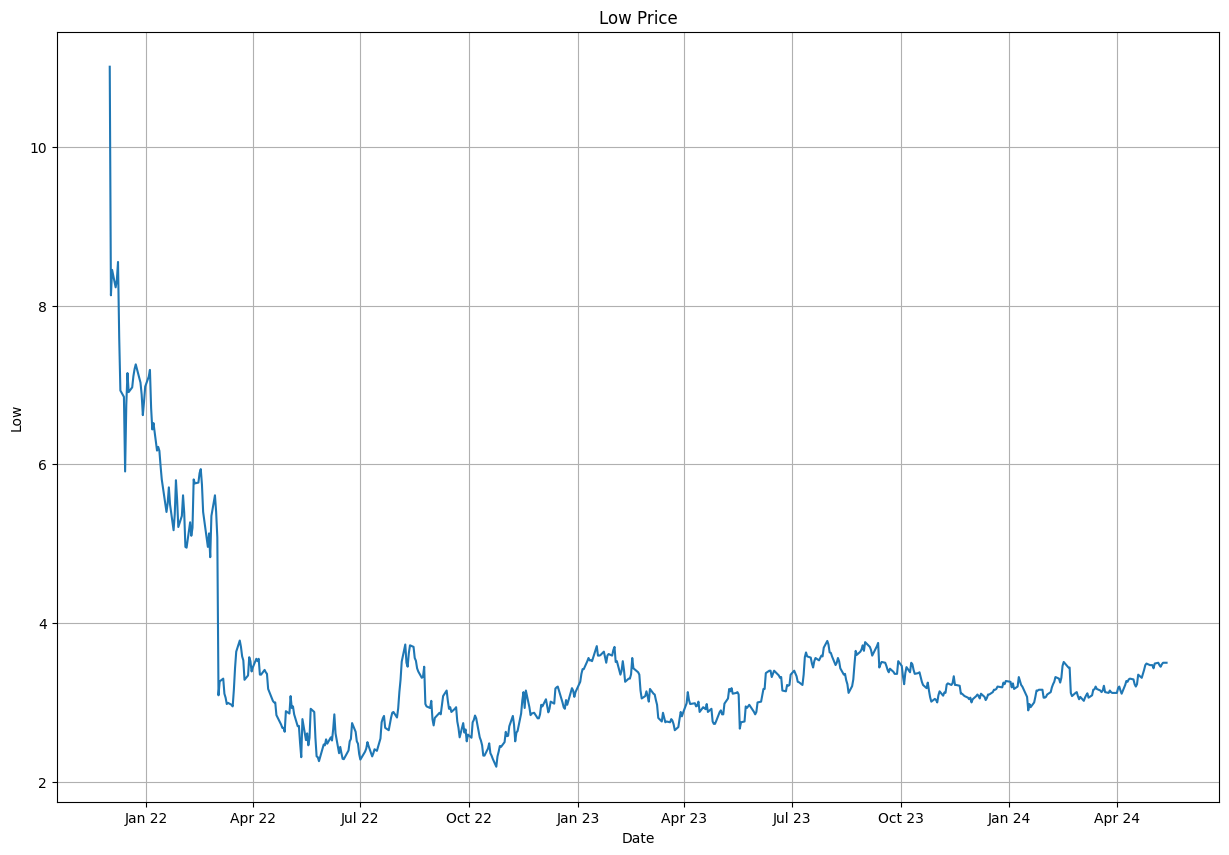

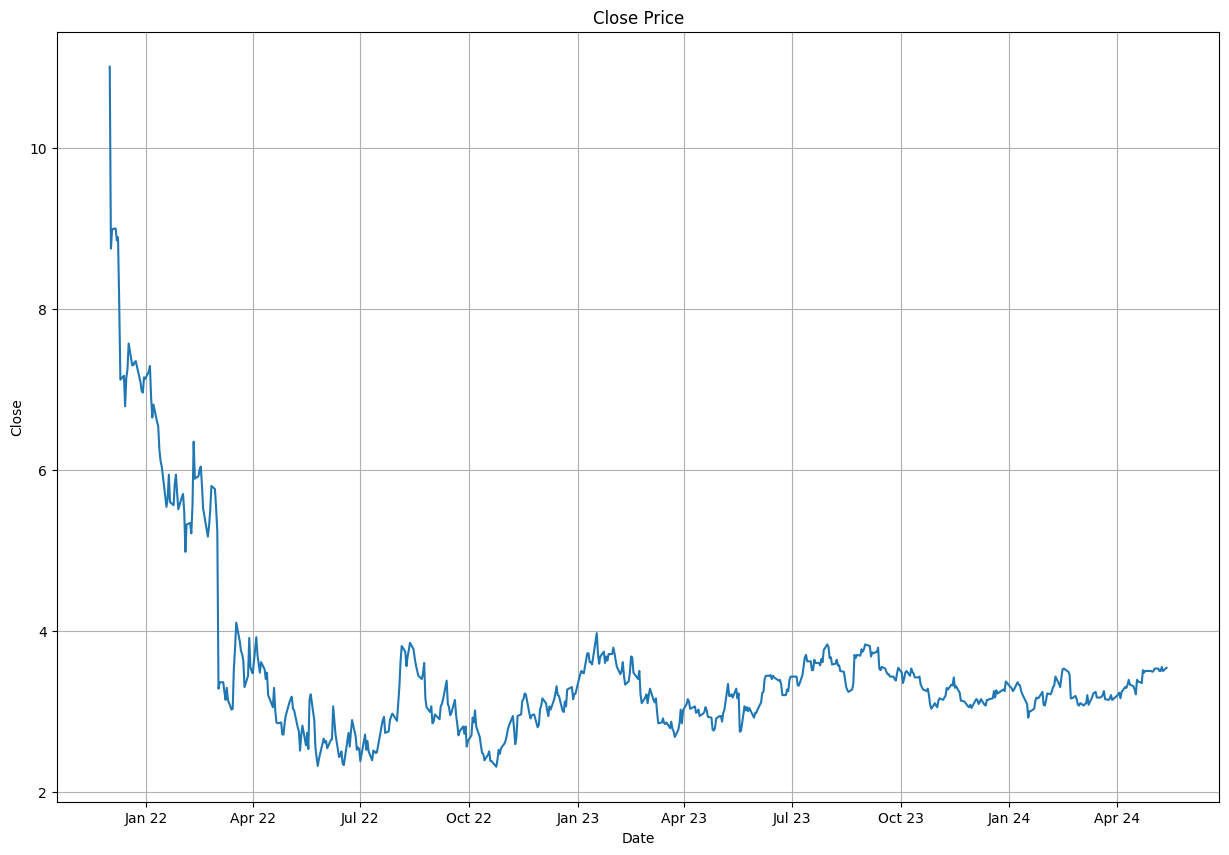

In [ ]:
#plotGraph(df['Open'], 'Open', 'Open Price')
plotGraph(df['High'], 'High', 'High Price')
plotGraph(df['Low'], 'Low', 'Low Price')
#plotGraph(df['Adj Close'], 'Adj Close', 'Adj Close Price')
plotGraph(df['Close'], 'Close', 'Close Price')
#plotGraph(df['Volume'], 'Volume', 'Volume')

#chosen variables are c




#Implementing Machine Learning Models

##AutoRegressive Integrated Moving Average (ARIMA)

*Definition:*

The differenced autoregressive model and the moving average model are combined to create the Autoregressive Integrated Moving Average ([ARIMA](https://www.sciencedirect.com/topics/mathematics/autoregressive-integrated-moving-average)) model. With this combined technique, the ARIMA model fits historical data well and aids in predicting future points in a time series.




To implement the ARIMA model, we must first decide on its parameters p, d, and q.

We need to first run the Augmented Dickey Fuller Test to determine whether the variables of interest are non-stationary. Should the p-value of the test be greater than 0.5, we conclude that the series is non-stationary and will require differencing. Else, we can proceed and set d = 0.

###Data Preparation for ARIMA Model

In [ ]:
dfARIMAhigh = df[['Date', 'High']]
dfARIMAhigh.set_index('Date', inplace=True)

dfARIMAclose = df[['Date', 'Close']]
dfARIMAclose.set_index('Date', inplace=True)

dfARIMAlow = df[['Date', 'Low']]
dfARIMAlow.set_index('Date', inplace=True)

In [ ]:
dfARIMAhigh=dfARIMAhigh.resample('W').mean()
dfARIMAclose=dfARIMAclose.resample('W').mean()
dfARIMAlow=dfARIMAlow.resample('W').mean()

### ADF test


In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

adf_test = adfuller(df['High'])

print('ADF Statistic: ' +  str(adf_test[0]))
print('p-value: ' + str(adf_test[1]))

ADF Statistic: -5.5572179013332095
p-value: 1.570988438548412e-06


In [ ]:
adf_test = adfuller(df['Close'])

print('ADF Statistic: ' +  str(adf_test[0]))
print('p-value: ' + str(adf_test[1]))

ADF Statistic: -4.8855337886627686
p-value: 3.720745320286429e-05


In [ ]:
adf_test = adfuller(df['Low'])

print('ADF Statistic: ' +  str(adf_test[0]))
print('p-value: ' + str(adf_test[1]))

ADF Statistic: -5.270750755671293
p-value: 6.29356740698197e-06


Because all p values are less than 0.05, we reject the null hypothesis and conclude that the data for High, Close, and Low are stationary, and we take d = 0 for all ARIMA model implementations going forward.

### High Price

 We then proceed with splitting the test and training dataset, where the training dataset if 80% of the original and the testing dataset is the remaining 20%

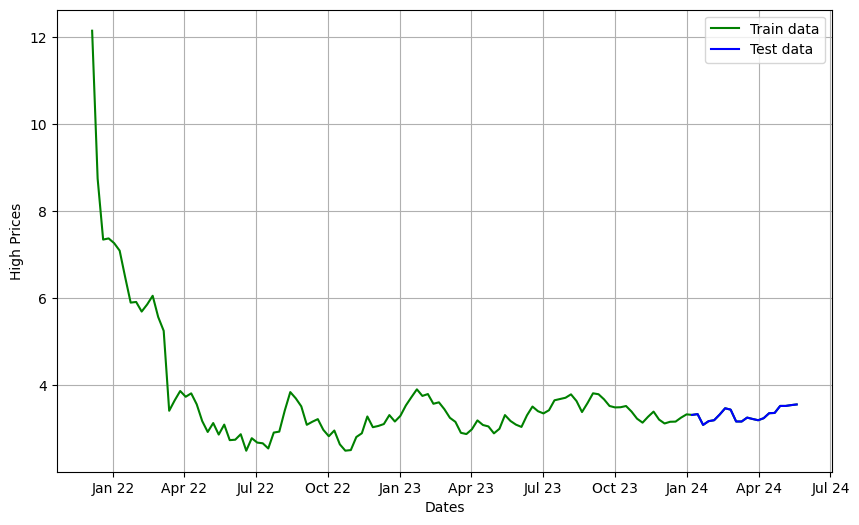

In [ ]:
#train_data, test_data = dfARIMAhigh[:int(len(dfARIMAhigh)*0.8)], dfARIMAhigh[int(len(dfARIMAhigh)*0.8):]

train_data = dfARIMAhigh[['High']][:'2023']
test_data = dfARIMAhigh[['High']]['2024':]

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
plt.ylabel('High Prices')
plt.plot(dfARIMAhigh, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Next, we import the auto arima function to help find the remaining parameters p, q to be used for the arima model later on. Auto Arima will test each combination of parameters and evaluate them based on the Akaike Information Criterion (AIC) value. The model with the lowest AIC will be chosen and the parameters of the chosen model will be returned.

In [ ]:
import pmdarima as pm
from pmdarima import auto_arima
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3,
                      d=None,
                      seasonal=False,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=612.416, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=132.827, Time=0.41 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=137.605, Time=0.63 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=131.666, Time=0.91 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=1.11 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.77 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=132.057, Time=1.94 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=301.453, Time=0.86 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=128.983, Time=1.75 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=133.358, Time=5.93 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=2.65 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=129.188, Time=2.13 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0]          
Total fit time: 21.2

In [ ]:
#function picks the best order and seasonal order taken from the autoarima function above
from statsmodels.tsa.statespace.sarimax import SARIMAX
best_model = SARIMAX(train_data,
                     order=model_autoARIMA.order)

print('Best Order: ' + str(best_model.order))

Best Order: (2, 0, 3)


We use the parameters returned from the function above and start fitting the model.

In [ ]:
model = ARIMA(train_data, order=best_model.order)
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                   High   No. Observations:                  109
Model:                 ARIMA(2, 0, 3)   Log Likelihood                 -57.626
Date:                Thu, 08 Aug 2024   AIC                            129.253
Time:                        17:54:38   BIC                            148.092
Sample:                    12-05-2021   HQIC                           136.893
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3838      3.925      1.626      0.104      -1.310      14.078
ar.L1          0.1791      0.134      1.333      0.182      -0.084       0.442
ar.L2          0.7974      0.145      5.484      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Now we can start plotting the results of the model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


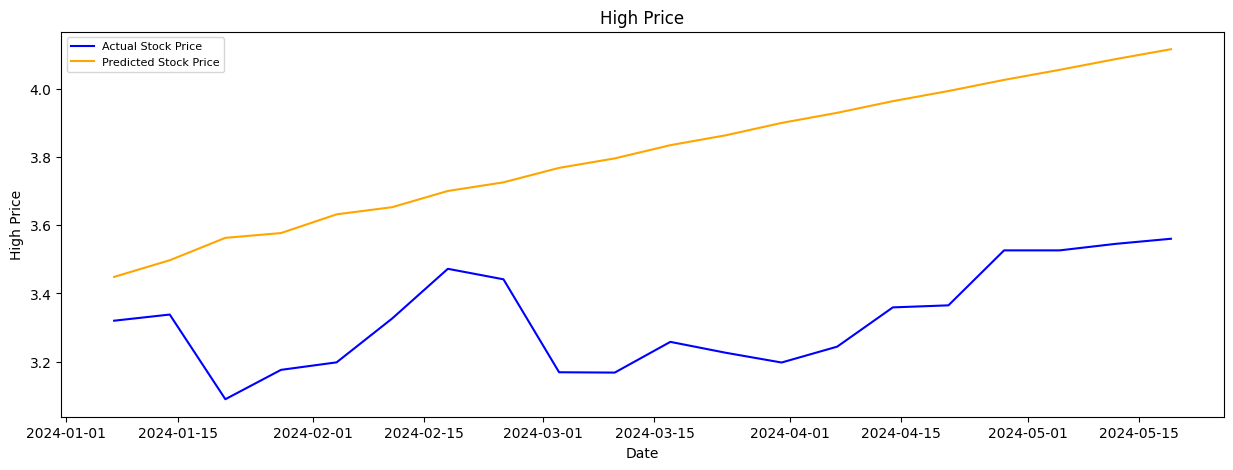

In [ ]:
fc = fitted.forecast(len(test_data), alpha=0.05) #getting the forecasted values
fc_series = pd.Series(fc, index=test_data.index) #turn forecasted values as a series

# Plotting the graph
plt.figure(figsize=(15,5), dpi=100)

plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')

plt.title('High Price')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Plotting the forecasted values along with the entire dataset

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


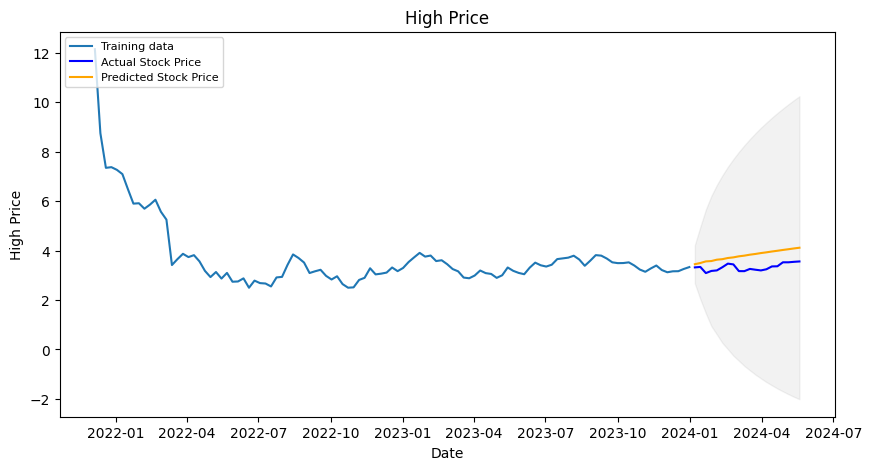

In [ ]:
conf_ins = fitted.get_forecast(len(test_data)).summary_frame()

fc = fitted.forecast(len(test_data), alpha=0.05)
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf_ins['mean_ci_lower'], index=test_data.index)
upper_series = pd.Series(conf_ins['mean_ci_upper'], index=test_data.index)

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='Training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.title('High Price')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.legend(loc='upper left', fontsize=8)
conf_ins = fitted.get_forecast(len(test_data)).summary_frame()
plt.show()

We repeat the same procedures for both the closing price and low price

In [ ]:
rmse = math.sqrt(mean_squared_error(test_data, fc_series))
print(f"The root mean squared error is {rmse}.")

The root mean squared error is 0.5095778677026362.


###Closing Price

In [ ]:
dfARIMAclose = df[['Date', 'Close']]
dfARIMAclose.set_index('Date', inplace=True)
dfARIMAclose

,Close
Date,
2021-12-01,11.01
2021-12-02,8.75
2021-12-03,8.99
2021-12-06,9.00
2021-12-07,8.85
...,...
2024-05-07,3.50
2024-05-08,3.50
2024-05-09,3.55


In [ ]:
dfARIMAclose=dfARIMAclose.resample('W').mean()

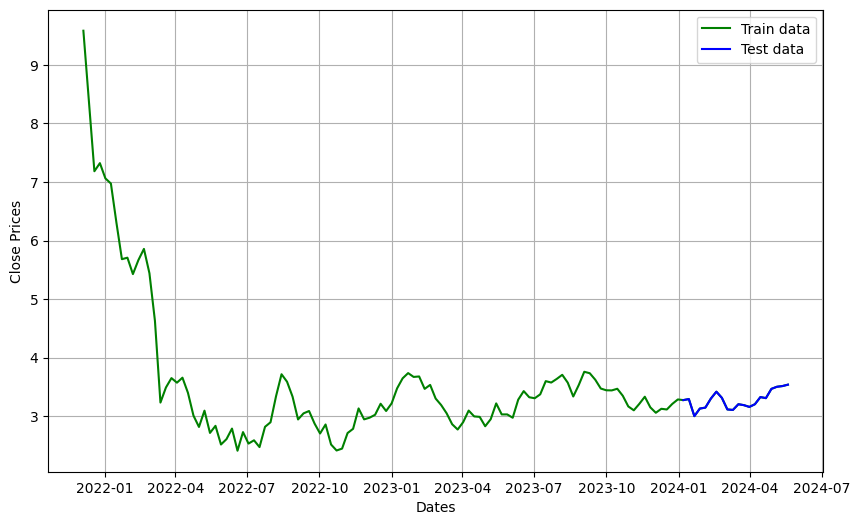

In [ ]:
train_data = dfARIMAclose[['Close']][:'2023']
test_data = dfARIMAclose[['Close']]['2024':]

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(dfARIMAclose, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [ ]:
import pmdarima as pm
from pmdarima import auto_arima
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',
                      max_p=3, max_q=3, # maximum p and q
                      d=None,
                      seasonal=False,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())

plt.show()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=602.590, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=1.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=54.568, Time=0.73 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=1.53 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=54.324, Time=0.96 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.59 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.53 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=55.854, Time=0.98 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=275.309, Time=0.20 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=57.796, Time=0.23 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=54.288, Time=0.18 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=182.760, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=54.613, Time=0.17 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=56.088, Time=0.32 sec
 ARIMA(1,

In [ ]:
#function picks the best order and seasonal order taken from the autoarima function above
from statsmodels.tsa.statespace.sarimax import SARIMAX
best_model = SARIMAX(train_data,
                     order=model_autoARIMA.order)

print('Best Order: ' + str(best_model.order))

Best Order: (1, 0, 2)


In [ ]:
model = ARIMA(train_data, order=best_model.order)
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  109
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 -22.144
Date:                Thu, 08 Aug 2024   AIC                             54.288
Time:                        17:54:54   BIC                             67.745
Sample:                    12-05-2021   HQIC                            59.746
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5934      2.186      2.559      0.010       1.310       9.877
ar.L1          0.9889      0.018     55.437      0.000       0.954       1.024
ma.L1          0.3470      0.072      4.852      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


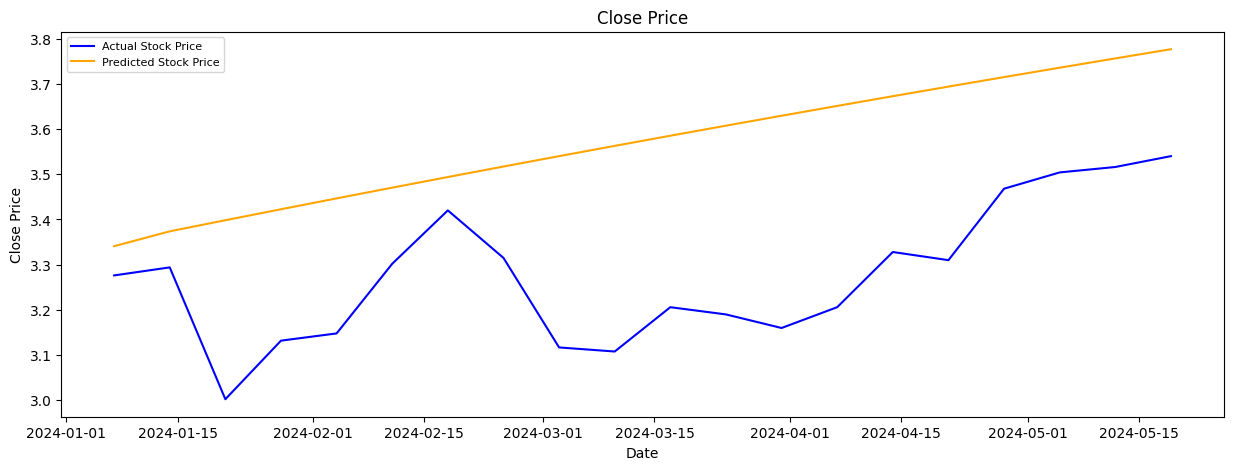

In [ ]:
conf_ins = fitted.get_forecast(len(test_data)).summary_frame()
fc = fitted.forecast(len(test_data), alpha=0.05)
fc_series = pd.Series(fc, index=test_data.index)

# Plot
plt.figure(figsize=(15,5), dpi=100)

plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')

plt.title('Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


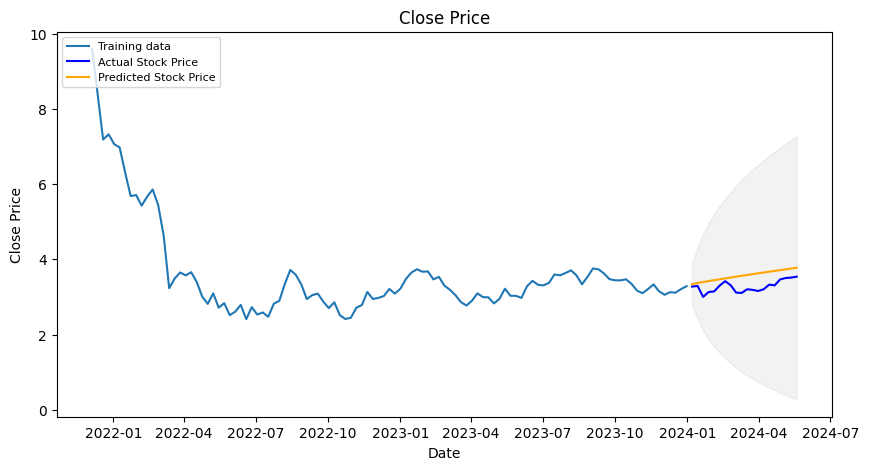

In [ ]:
conf_ins = fitted.get_forecast(len(test_data)).summary_frame()

fc = fitted.forecast(len(test_data), alpha=0.05)
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf_ins['mean_ci_lower'], index=test_data.index)
upper_series = pd.Series(conf_ins['mean_ci_upper'], index=test_data.index)

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='Training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.title('Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left', fontsize=8)
conf_ins = fitted.get_forecast(len(test_data)).summary_frame()
plt.show()

In [ ]:
rmse = math.sqrt(mean_squared_error(test_data, fc_series))
print(f"The root mean squared error is {rmse}.")

The root mean squared error is 0.3186823011593533.


###Low Price


In [ ]:
dfARIMAlow = df[['Date', 'Low']]
dfARIMAlow.set_index('Date', inplace=True)
dfARIMAlow

,Low
Date,
2021-12-01,11.01
2021-12-02,8.13
2021-12-03,8.45
2021-12-06,8.23
2021-12-07,8.32
...,...
2024-05-07,3.47
2024-05-08,3.45
2024-05-09,3.48


In [ ]:
dfARIMAlow = dfARIMAlow.resample('W').mean()

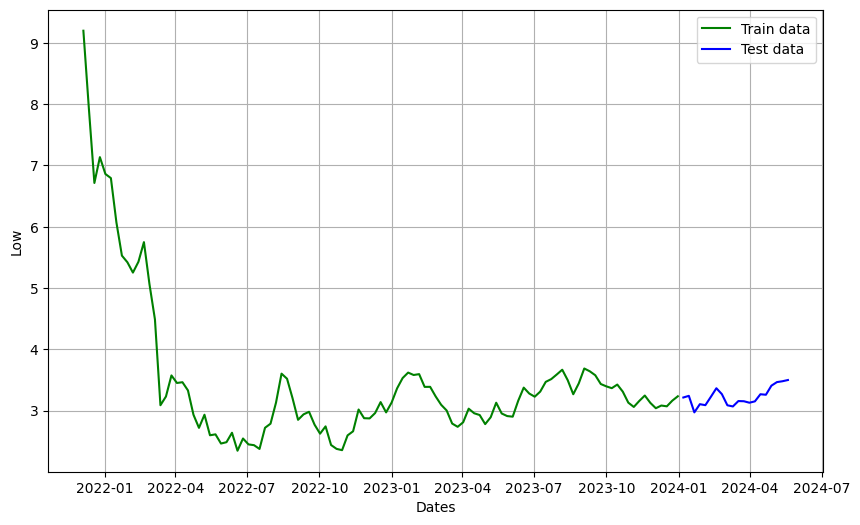

In [ ]:
train_data = dfARIMAlow[['Low']][:'2023']
test_data = dfARIMAlow[['Low']]['2024':]

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Low')
plt.plot(train_data, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [ ]:
import pmdarima as pm
from pmdarima import auto_arima
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      d=None,
                      seasonal=False,   # No Seasonality
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())
plt.show()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=595.396, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=52.233, Time=1.36 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=53.653, Time=0.38 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=52.927, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=54.728, Time=0.30 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=52.212, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=237.897, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=53.593, Time=0.30 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=52.840, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=353.260, Time=0.03 sec
 ARIMA(0,

In [ ]:
#function picks the best order and seasonal order taken from the autoarima function above
from statsmodels.tsa.statespace.sarimax import SARIMAX
best_model = SARIMAX(train_data,
                     order=model_autoARIMA.order)

print('Best Order: ' + str(best_model.order))

Best Order: (2, 0, 0)


In [ ]:
model = ARIMA(train_data, order=best_model.order)
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                    Low   No. Observations:                  109
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 -21.835
Date:                Thu, 08 Aug 2024   AIC                             51.670
Time:                        17:55:02   BIC                             62.435
Sample:                    12-05-2021   HQIC                            56.035
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3564      2.168      2.471      0.013       1.107       9.606
ar.L1          1.3054      0.049     26.411      0.000       1.208       1.402
ar.L2         -0.3128      0.047     -6.655      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


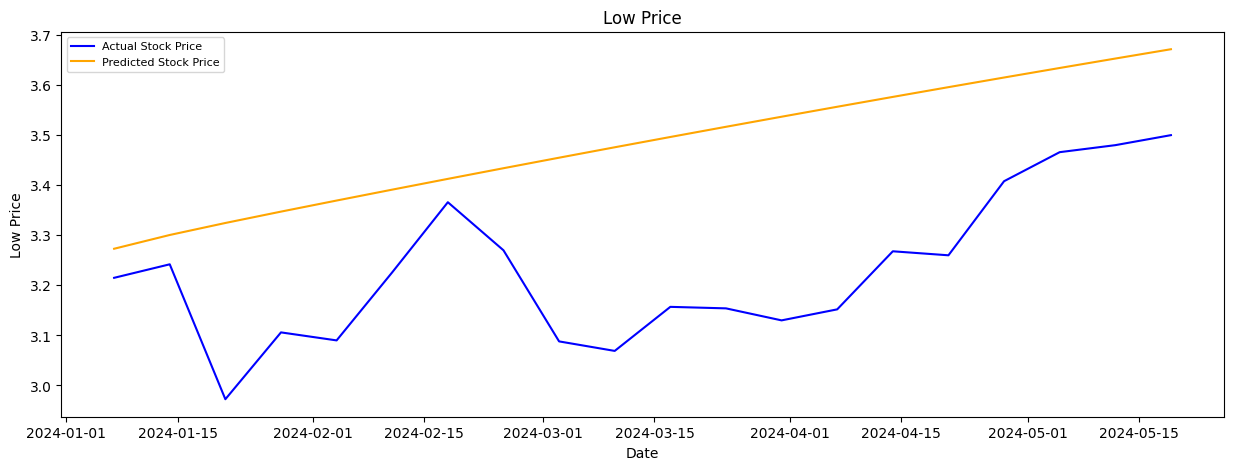

In [ ]:
conf_ins = fitted.get_forecast(len(test_data)).summary_frame()
fc = fitted.forecast(len(test_data), alpha=0.05)
fc_series = pd.Series(fc, index=test_data.index)

# Plot
plt.figure(figsize=(15,5), dpi=100)

plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')

plt.title('Low Price')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


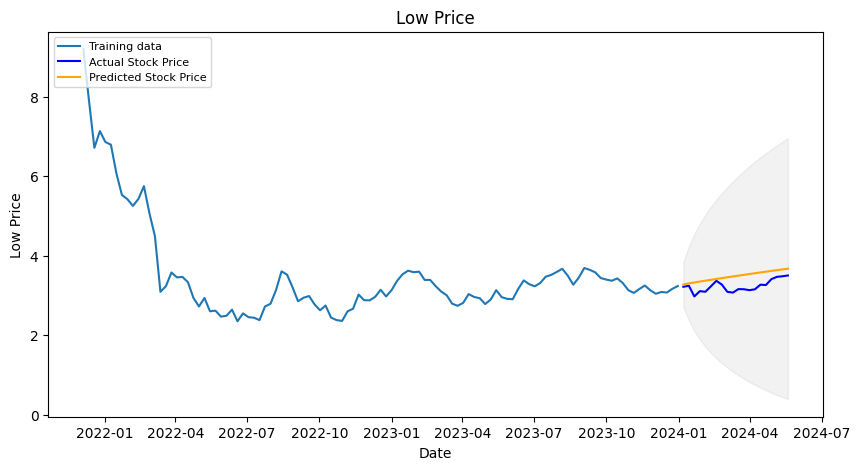

In [ ]:
conf_ins = fitted.get_forecast(len(test_data)).summary_frame()

fc = fitted.forecast(len(test_data), alpha=0.05)
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf_ins['mean_ci_lower'], index=test_data.index)
upper_series = pd.Series(conf_ins['mean_ci_upper'], index=test_data.index)

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='Training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.title('Low Price')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.legend(loc='upper left', fontsize=8)
conf_ins = fitted.get_forecast(len(test_data)).summary_frame()
plt.show()

#### Model Evaluation


In [ ]:
rmse = math.sqrt(mean_squared_error(test_data, fc_series))
print(f"The root mean squared error is {rmse}.")

The root mean squared error is 0.2772925706446486.


 ## Long Short-Term Memory (LSTM) Model

 *Definition:*

A subset of recurrent neural networks (RNNs) known as long short-term memory ([LSTM](https://www.sciencedirect.com/topics/computer-science/long-short-term-memory-network)) networks are able to learn long-term dependencies without experiencing the vanishing gradient issue that standard RNNs have.

LSTMs generally have three to four gates, including input, output, and a particular forget gate.


### Import Necessary Libraries

Import necessary libraries for data preprocessing, LSTM modeling, and evaluation.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

### High Price



**Data Preparation**

The following block of code extracts the 'High' prices from the DataFrame `df` and processes it by converting the 'Date' column to a datetime format. It then sets 'Date' as the index.

In [ ]:
df_high = df[['Date', 'High']]
df_high['Date'] = pd.to_datetime(df_high['Date'])
df_high.set_index('Date', inplace=True)

<ipython-input-72-b1ed7e237a07>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high['Date'] = pd.to_datetime(df_high['Date'])


**Data Visualization**

This block plots the 'High' prices for the training set (up to 2023) and the test set (from 2024 onwards).

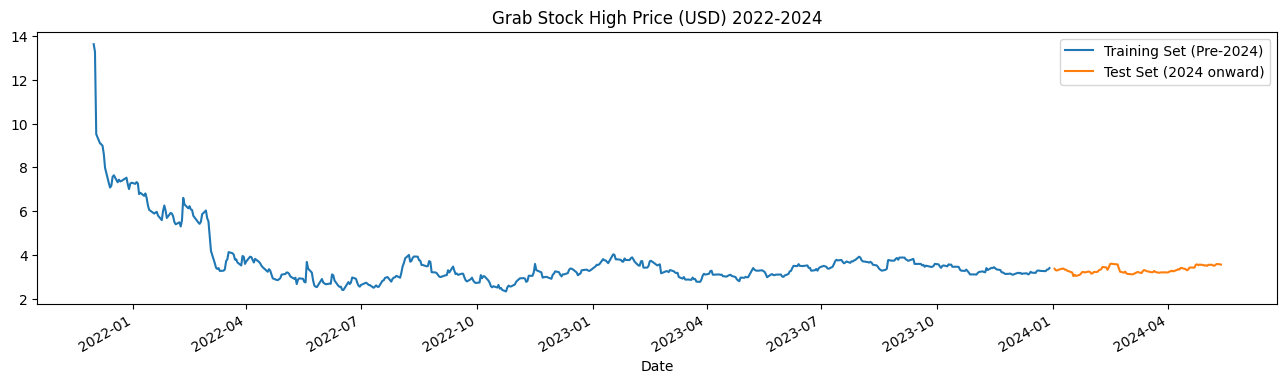

In [ ]:
df_high["High"][:'2023'].plot(figsize=(16, 4), legend=True)
df_high["High"]['2024':].plot(figsize=(16, 4), legend=True)
plt.legend(['Training Set (Pre-2024)', 'Test Set (2024 onward)'])
plt.title('Grab Stock High Price (USD) 2022-2024')
plt.show()

**Splitting Data into Training and Test Sets**

The following block separates the data into training and test sets.

In [ ]:
training_set = df_high[['High']][:'2023'].values
test_set = df_high[['High']]['2024':].values

**Data Scaling**

This block scales the training data using `MinMaxScaler`.

In [ ]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

**Preparing Training Data**

This block prepares the data for training the LSTM model by creating sequences of 60 time steps.

In [ ]:
X_train = []
y_train = []

for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i - 60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train = np.array(X_train)
y_train = np.array(y_train)

**Building the LSTM Model**

The LSTM model is built and compiled in the following block.

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units=150, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=30))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer='adam', loss='mean_squared_error')

regressor.fit(X_train, y_train, epochs=150, batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 202ms/step - loss: 0.0032
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step - loss: 0.0012
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - loss: 8.4136e-04
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 283ms/step - loss: 9.2416e-04
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 188ms/step - loss: 8.8251e-04
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 190ms/step - loss: 8.6743e-04
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 330ms/step - loss: 9.4819e-04
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 194ms/step - loss: 9.4953e-04
Epoch 9/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 185ms/step - loss: 8.1187e-04
Epoch 10/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 301ms/step - loss: 7.5019e-04
Epoch 11/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 201ms/step - loss: 7.8555e-04
Epoch 12/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 252ms/step - loss: 8.4699e-04
Epoch 13/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 286ms/step - loss: 7.8160e-04
Epoch 14/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 197ms/step - loss: 9.343

**Preparing Data for Testing**

This block preprocesses the test data by concatenating it with the training data and scaling it.

In [ ]:
dataset_total = pd.concat((df_high[['High']][:'2023'], df_high[['High']]['2024':]), axis=0)
inputs = dataset_total[len(dataset_total) - len(test_set) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

**Creating Test Data**

The test data is prepared in this block by creating sequences of 60 time steps.

In [ ]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i - 60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

**Making Predictions**

The LSTM model makes predictions on the test data, which are then inverse transformed to get the actual scale.

In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 356ms/step


**Plotting Predictions**

The following function plots the actual stock prices and the predicted stock prices.

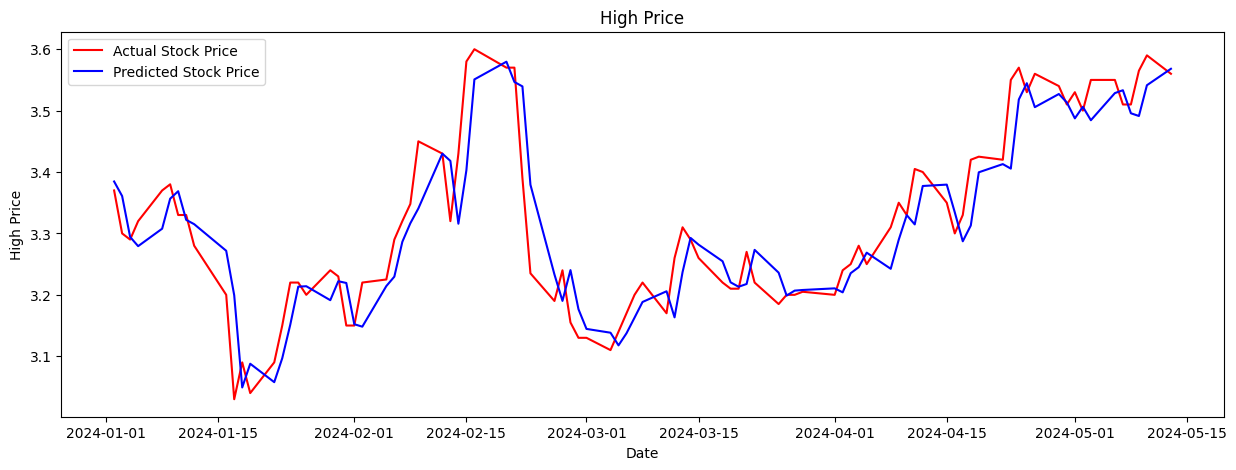

In [ ]:
def plot_prediction(test, prediction, dates):
    plt.figure(figsize=(15, 5), dpi=100)
    plt.plot(dates, test, color='red', label="Actual Stock Price")
    plt.plot(dates, prediction, color="blue", label="Predicted Stock Price")
    plt.title("High Price")
    plt.xlabel("Date")
    plt.ylabel("High Price")
    plt.legend()
    plt.xticks(rotation=0)
    plt.show()

plot_prediction(test_set, predicted_stock_price, df_high.index[-len(test_set):])

**Evaluating the Model**

The following function calculates and prints the RMSE between the actual and predicted stock prices.

The [root mean squared error](https:www.sciencedirect.com/topics/engineering/root-mean-squared-error) is a metric used to evaluate the performance of regression models where the lower value indicates a better performance.

*Results:*

The model's predictions are, on average, off by approximately 0.0572 units from the actual values.

In [ ]:
def return_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print(f"The root mean squared error is {rmse}.")

return_rmse(test_set, predicted_stock_price)

The root mean squared error is 0.05831556676177744.


### Closing Price

**Data Preparation**

The following block of code extracts the 'Close' prices from the DataFrame `df` and processes it by converting the 'Date' column to a datetime format. It then sets 'Date' as the index.

In [ ]:
df_close = df[['Date', 'Close']]
df_close['Date'] = pd.to_datetime(df_close['Date'])
df_close.set_index('Date', inplace=True)

<ipython-input-83-449c21cbd71b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close['Date'] = pd.to_datetime(df_close['Date'])


**Data Visualization**

This block plots the 'Close' prices for the training set (up to 2023) and the test set (from 2024 onwards).

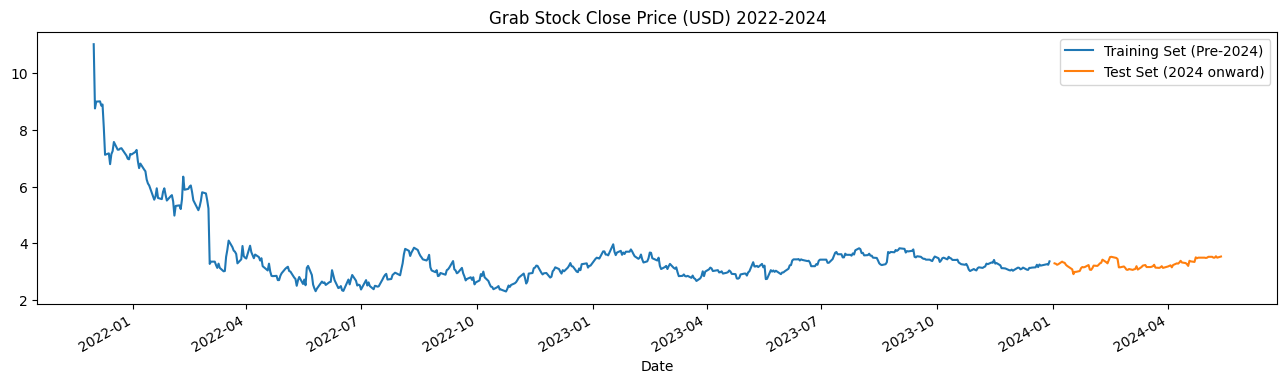

In [ ]:
df_close["Close"][:'2023'].plot(figsize=(16, 4), legend=True)
df_close["Close"]['2024':].plot(figsize=(16, 4), legend=True)
plt.legend(['Training Set (Pre-2024)', 'Test Set (2024 onward)'])
plt.title('Grab Stock Close Price (USD) 2022-2024')
plt.show()

**Splitting Data into Training and Test Sets**

The following block separates the data into training and test sets.

In [ ]:
training_set_close = df_close[['Close']][:'2023'].values
test_set_close = df_close[['Close']]['2024':].values

**Data Scaling**

This block scales the training data using `MinMaxScaler`.

In [ ]:
sc_close = MinMaxScaler(feature_range=(0, 1))
training_set_scaled_close = sc_close.fit_transform(training_set_close)

**Preparing Training Data**

This block prepares the data for training the LSTM model by creating sequences of 60 time steps.

In [ ]:
X_train_close = []
y_train_close = []

for i in range(60, len(training_set_scaled_close)):
    X_train_close.append(training_set_scaled_close[i - 60:i, 0])
    y_train_close.append(training_set_scaled_close[i, 0])

X_train_close = np.array(X_train_close)
y_train_close = np.array(y_train_close)

**Building the LSTM Model**

The LSTM model is built and compiled in the following block.

In [ ]:
regressor_close = Sequential()

regressor_close.add(LSTM(units=150, return_sequences=True, input_shape=(X_train_close.shape[1], 1)))
regressor_close.add(Dropout(0.2))

regressor_close.add(LSTM(units=100, return_sequences=True))
regressor_close.add(Dropout(0.2))

regressor_close.add(LSTM(units=50, return_sequences=True))
regressor_close.add(Dropout(0.2))

regressor_close.add(LSTM(units=30))
regressor_close.add(Dropout(0.2))

regressor_close.add(Dense(units=1))

regressor_close.compile(optimizer='adam', loss='mean_squared_error')

regressor_close.fit(X_train_close, y_train_close, epochs=150, batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 328ms/step - loss: 0.0045
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 189ms/step - loss: 0.0022
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 188ms/step - loss: 0.0017
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 250ms/step - loss: 0.0018
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 195ms/step - loss: 0.0014
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 192ms/step - loss: 0.0015
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 307ms/step - loss: 0.0015
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 191ms/step - loss: 0.0017
Epoch 9/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - loss: 0.0015
Epoch 10/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 250ms/step - loss: 0.0012
Epoch 11/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 198ms/step - loss: 0.0015
Epoch 12/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 192ms/step - loss: 0.0013
Epoch 13/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 290ms/step - loss: 0.0012
Epoch 14/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 193ms/step - loss: 0.0013
Epoch 15/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s

**Preparing Data for Testing**

This block preprocesses the test data by concatenating it with the training data and scaling it.

In [ ]:
dataset_total_close = pd.concat((df_close[['Close']][:'2023'], df_close[['Close']]['2024':]), axis=0)
inputs_close = dataset_total_close[len(dataset_total_close) - len(test_set_close) - 60:].values
inputs_close = inputs_close.reshape(-1, 1)
inputs_close = sc_close.transform(inputs_close)

**Creating Test Data**

The test data is prepared in this block by creating sequences of 60 time steps.

In [ ]:
X_test_close = []
for i in range(60, len(inputs_close)):
    X_test_close.append(inputs_close[i - 60:i, 0])
X_test_close = np.array(X_test_close)
X_test_close = np.reshape(X_test_close, (X_test_close.shape[0], X_test_close.shape[1], 1))

**Making Predictions**

The LSTM model makes predictions on the test data, which are then inverse transformed to get the actual scale.

In [ ]:
predicted_stock_price_close = regressor_close.predict(X_test_close)
predicted_stock_price_close = sc_close.inverse_transform(predicted_stock_price_close)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 573ms/step


**Plotting Predictions**

The following function plots the actual stock prices and the predicted stock prices.

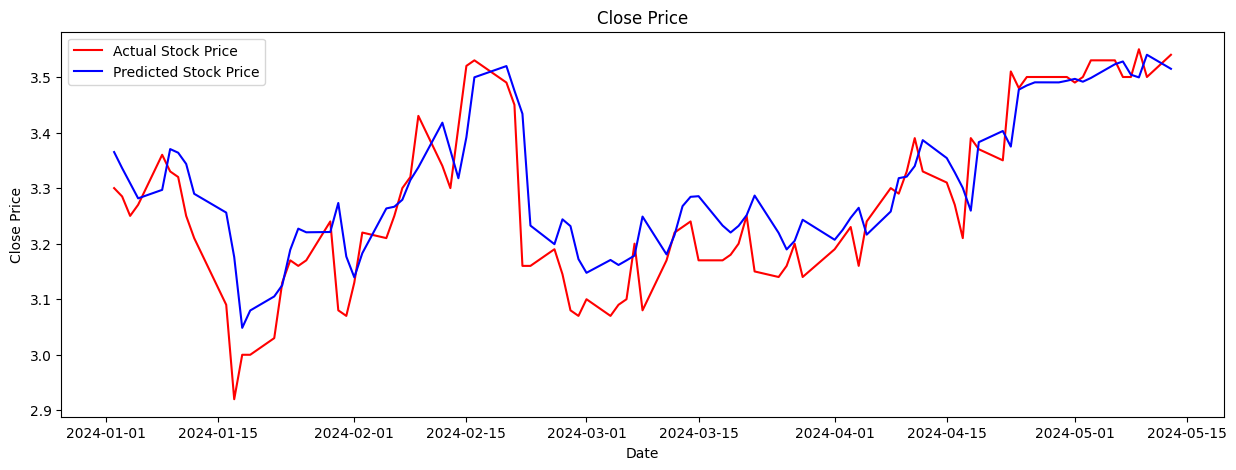

In [ ]:
def plot_prediction(test, prediction, dates):
    plt.figure(figsize=(15, 5), dpi=100)
    plt.plot(dates, test, color='red', label="Actual Stock Price")
    plt.plot(dates, prediction, color="blue", label="Predicted Stock Price")
    plt.title("Close Price")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.legend()
    plt.xticks(rotation=0)
    plt.show()

plot_prediction(test_set_close, predicted_stock_price_close, df_close.index[-len(test_set):])

**Evaluating the Model**

The following function calculates and prints the RMSE between the actual and predicted stock prices.

*Results:*

The model's predictions are, on average, off by approximately 0.0730 units from the actual values.

In [ ]:
return_rmse(test_set_close, predicted_stock_price_close)

The root mean squared error is 0.07823848763919229.


### Low Price

**Data Preparation**

The following block of code extracts the 'Low' prices from the DataFrame `df` and processes it by converting the 'Date' column to a datetime format. It then sets 'Date' as the index.

In [ ]:
df_low = df[['Date', 'Low']]
df_low['Date'] = pd.to_datetime(df_low['Date'])
df_low.set_index('Date', inplace=True)

<ipython-input-94-6c2e8b4cb143>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low['Date'] = pd.to_datetime(df_low['Date'])


**Data Visualization**

This block plots the 'Low' prices for the training set (up to 2023) and the test set (from 2024 onwards).

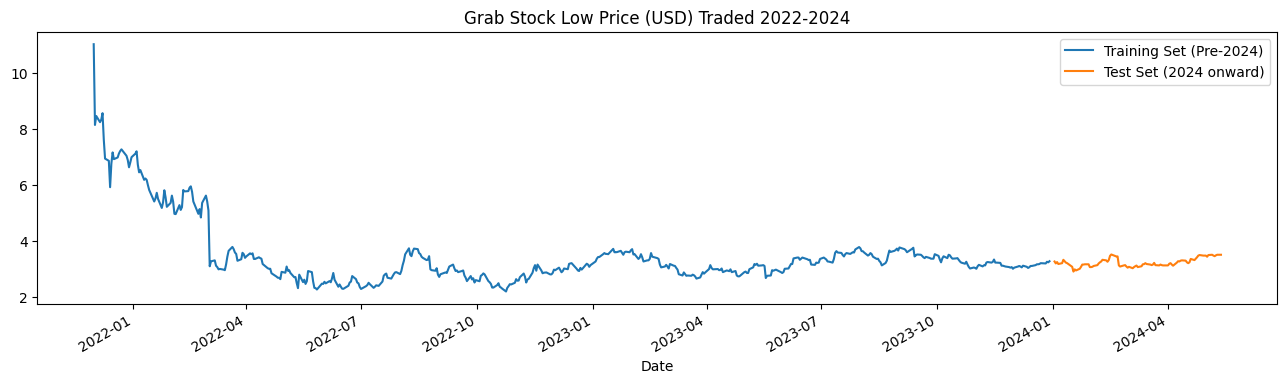

In [ ]:
df_low["Low"][:'2023'].plot(figsize=(16, 4), legend=True)
df_low["Low"]['2024':].plot(figsize=(16, 4), legend=True)
plt.legend(['Training Set (Pre-2024)', 'Test Set (2024 onward)'])
plt.title('Grab Stock Low Price (USD) Traded 2022-2024')
plt.show()

**Splitting Data into Training and Test Sets**

The following block separates the data into training and test sets.

In [ ]:
training_set_low = df_low[['Low']][:'2023'].values
test_set_low = df_low[['Low']]['2024':].values

**Data Scaling**

This block scales the training data using `MinMaxScaler`.

In [ ]:
sc_low = MinMaxScaler(feature_range=(0, 1))
training_set_scaled_low = sc_low.fit_transform(training_set_low)

**Preparing Training Data**

This block prepares the data for training the LSTM model by creating sequences of 60 time steps.

In [ ]:
X_train_low = []
y_train_low = []

for i in range(60, len(training_set_scaled_low)):
    X_train_low.append(training_set_scaled_low[i - 60:i, 0])
    y_train_low.append(training_set_scaled_low[i, 0])

X_train_low = np.array(X_train_low)
y_train_low = np.array(y_train_low)
X_train_low = np.reshape(X_train_low, (X_train_low.shape[0], X_train_low.shape[1], 1))

**Building the LSTM Model**

The LSTM model is built and compiled in the following block.

In [ ]:
regressor_low = Sequential()
#regressor_low.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_low.shape[1], 1)))
#regressor_low.add(Dropout(0.2))

#regressor_low.add(LSTM(units=50, return_sequences=False))
#regressor_low.add(Dropout(0.2))

#regressor_low.add(Dense(units=1))

#regressor_low.compile(optimizer='adam', loss='mean_squared_error')

#regressor_low.fit(X_train_low, y_train_low, epochs=50, batch_size=32)


regressor_low.add(LSTM(units=150, return_sequences=True, input_shape=(X_train_low.shape[1], 1)))
regressor_low.add(Dropout(0.2))

regressor_low.add(LSTM(units=100, return_sequences=True))
regressor_low.add(Dropout(0.2))

regressor_low.add(LSTM(units=50, return_sequences=True))
regressor_low.add(Dropout(0.2))

regressor_low.add(LSTM(units=30))
regressor_low.add(Dropout(0.2))

regressor_low.add(Dense(units=1))

regressor_low.compile(optimizer='adam', loss='mean_squared_error')

regressor_low.fit(X_train_low, y_train_low, epochs=150, batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 271ms/step - loss: 0.0043
Epoch 2/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 227ms/step - loss: 0.0019
Epoch 3/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 191ms/step - loss: 0.0017
Epoch 4/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 272ms/step - loss: 0.0016
Epoch 5/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 191ms/step - loss: 0.0017
Epoch 6/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 194ms/step - loss: 0.0014
Epoch 7/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 263ms/step - loss: 0.0013
Epoch 8/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 187ms/step - loss: 0.0013
Epoch 9/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - loss: 0.0014
Epoch 10/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 197ms/step - loss: 0.0013
Epoch 11/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 196ms/step - loss: 0.0014
Epoch 12/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 244ms/step - loss: 0.0012
Epoch 13/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - loss: 0.0012
Epoch 14/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - loss: 0.0012
Epoch 15/150
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s

**Preparing Data for Testing**

This block preprocesses the test data by concatenating it with the training data and scaling it.

In [ ]:
dataset_total_low = pd.concat((df_low[['Low']][:'2023'], df_low[['Low']]['2024':]), axis=0)
inputs_low = dataset_total_low[len(dataset_total_low) - len(test_set_low) - 60:].values
inputs_low = inputs_low.reshape(-1, 1)
inputs_low = sc_low.transform(inputs_low)

**Creating Test Data**

The test data is prepared in this block by creating sequences of 60 time steps.

In [ ]:
X_test_low = []
for i in range(60, len(inputs_low)):
    X_test_low.append(inputs_low[i - 60:i, 0])
X_test_low = np.array(X_test_low)
X_test_low = np.reshape(X_test_low, (X_test_low.shape[0], X_test_low.shape[1], 1))

**Making Predictions**

The LSTM model makes predictions on the test data, which are then inverse transformed to get the actual scale.

In [ ]:
predicted_stock_price_low = regressor_low.predict(X_test_low)
predicted_stock_price_low = sc_low.inverse_transform(predicted_stock_price_low)

2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step 

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 366ms/step


**Plotting Predictions**

The following function plots the actual stock prices and the predicted stock prices.

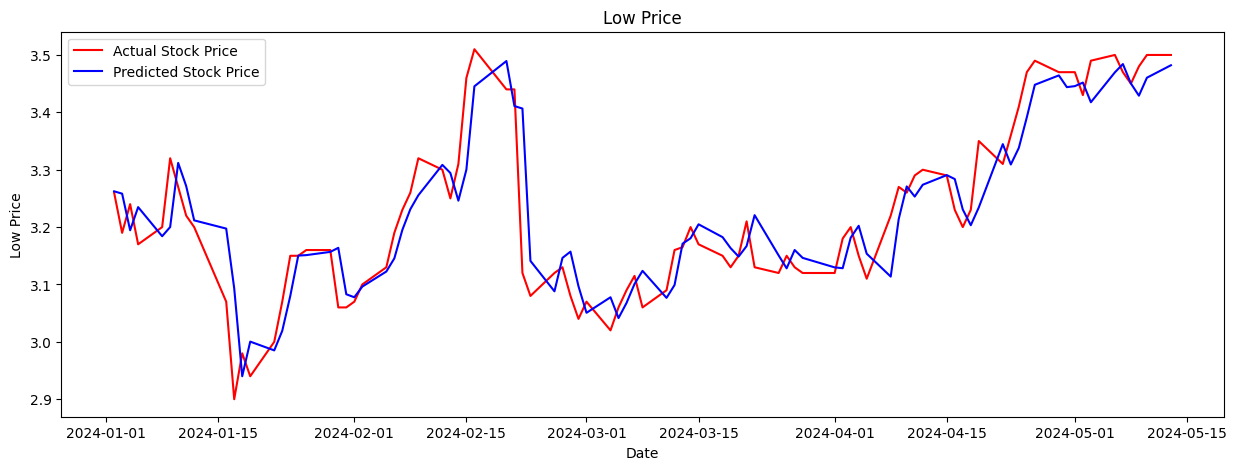

In [ ]:
def plot_prediction(test, prediction, dates):
    plt.figure(figsize=(15, 5), dpi=100)
    plt.plot(dates, test, color='red', label="Actual Stock Price")
    plt.plot(dates, prediction, color="blue", label="Predicted Stock Price")
    plt.title("Low Price")
    plt.xlabel("Date")
    plt.ylabel("Low Price")
    plt.legend()
    plt.xticks(rotation=0)
    plt.show()

plot_prediction(test_set_low, predicted_stock_price_low, df_low.index[-len(test_set_low):])

**Evaluating the Model**

The following function calculates and prints the RMSE between the actual and predicted stock prices.

*Results:*

The model's predictions are, on average, off by approximately ____ units from the actual values.

In [ ]:
return_rmse(test_set_low, predicted_stock_price_low)

The root mean squared error is 0.06196919769510229.
